In [274]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

In [276]:
data= pd.read_csv(r"C:\Users\yasmi\Downloads\Bank Data (1) (1).csv")

In [278]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


age: age of a person

job: type of job

marital: marital status

education

default: has credit in default? ('no','yes','unknown')

balance: average yearly balance

housing: has housing loan? ('no','yes','unknown')

loan: has personal loanduration ? ('no','yes','unknown')

contact: contact communication type ('cellular','telephone')

day: The day of the month when the contact was last made.

month: The month of the year when the last contact was made.

duration: The duration of the last contact in seconds.

campaign: The number of contacts performed during the campaign for
the individual.
    
pdays: The number of days that passed after the last contact from a
previous campaign. A value of -1 indicates that the
individual was not previously contacted.

previous: The number of contacts performed before this campaign for
the individual.

poutcome: The outcome of the previous marketting campaign (e.g.
success, failure, others)

The aim of the project is to predict if the client will subscribe
(yes/no) to a term deposit. This is a classification

model, because the target variable is categorical. We can apply
Logistic, Decision Tree, Random Forest etc for this data set.

In [281]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [283]:
#applying value_counts to check the number of distincts categories within each colomns if the data set 

In [285]:
for column in data.columns:
    print(f"unique values and Value counts for column {column}:")
    print(data[column].unique())
    print(data[column].value_counts())
    print()

unique values and Value counts for column age:
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: count, Length: 76, dtype: int64

unique values and Value counts for column job:
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

unique values and Value counts for column marital:
['married' 'single' 'div

In [287]:
categorical_columns=["job","marital","education","default","housing","loan","contact","month","poutcome","deposit"]
contunous_columns=["age","balance","day","duration","campaign","pdays","previous"]             

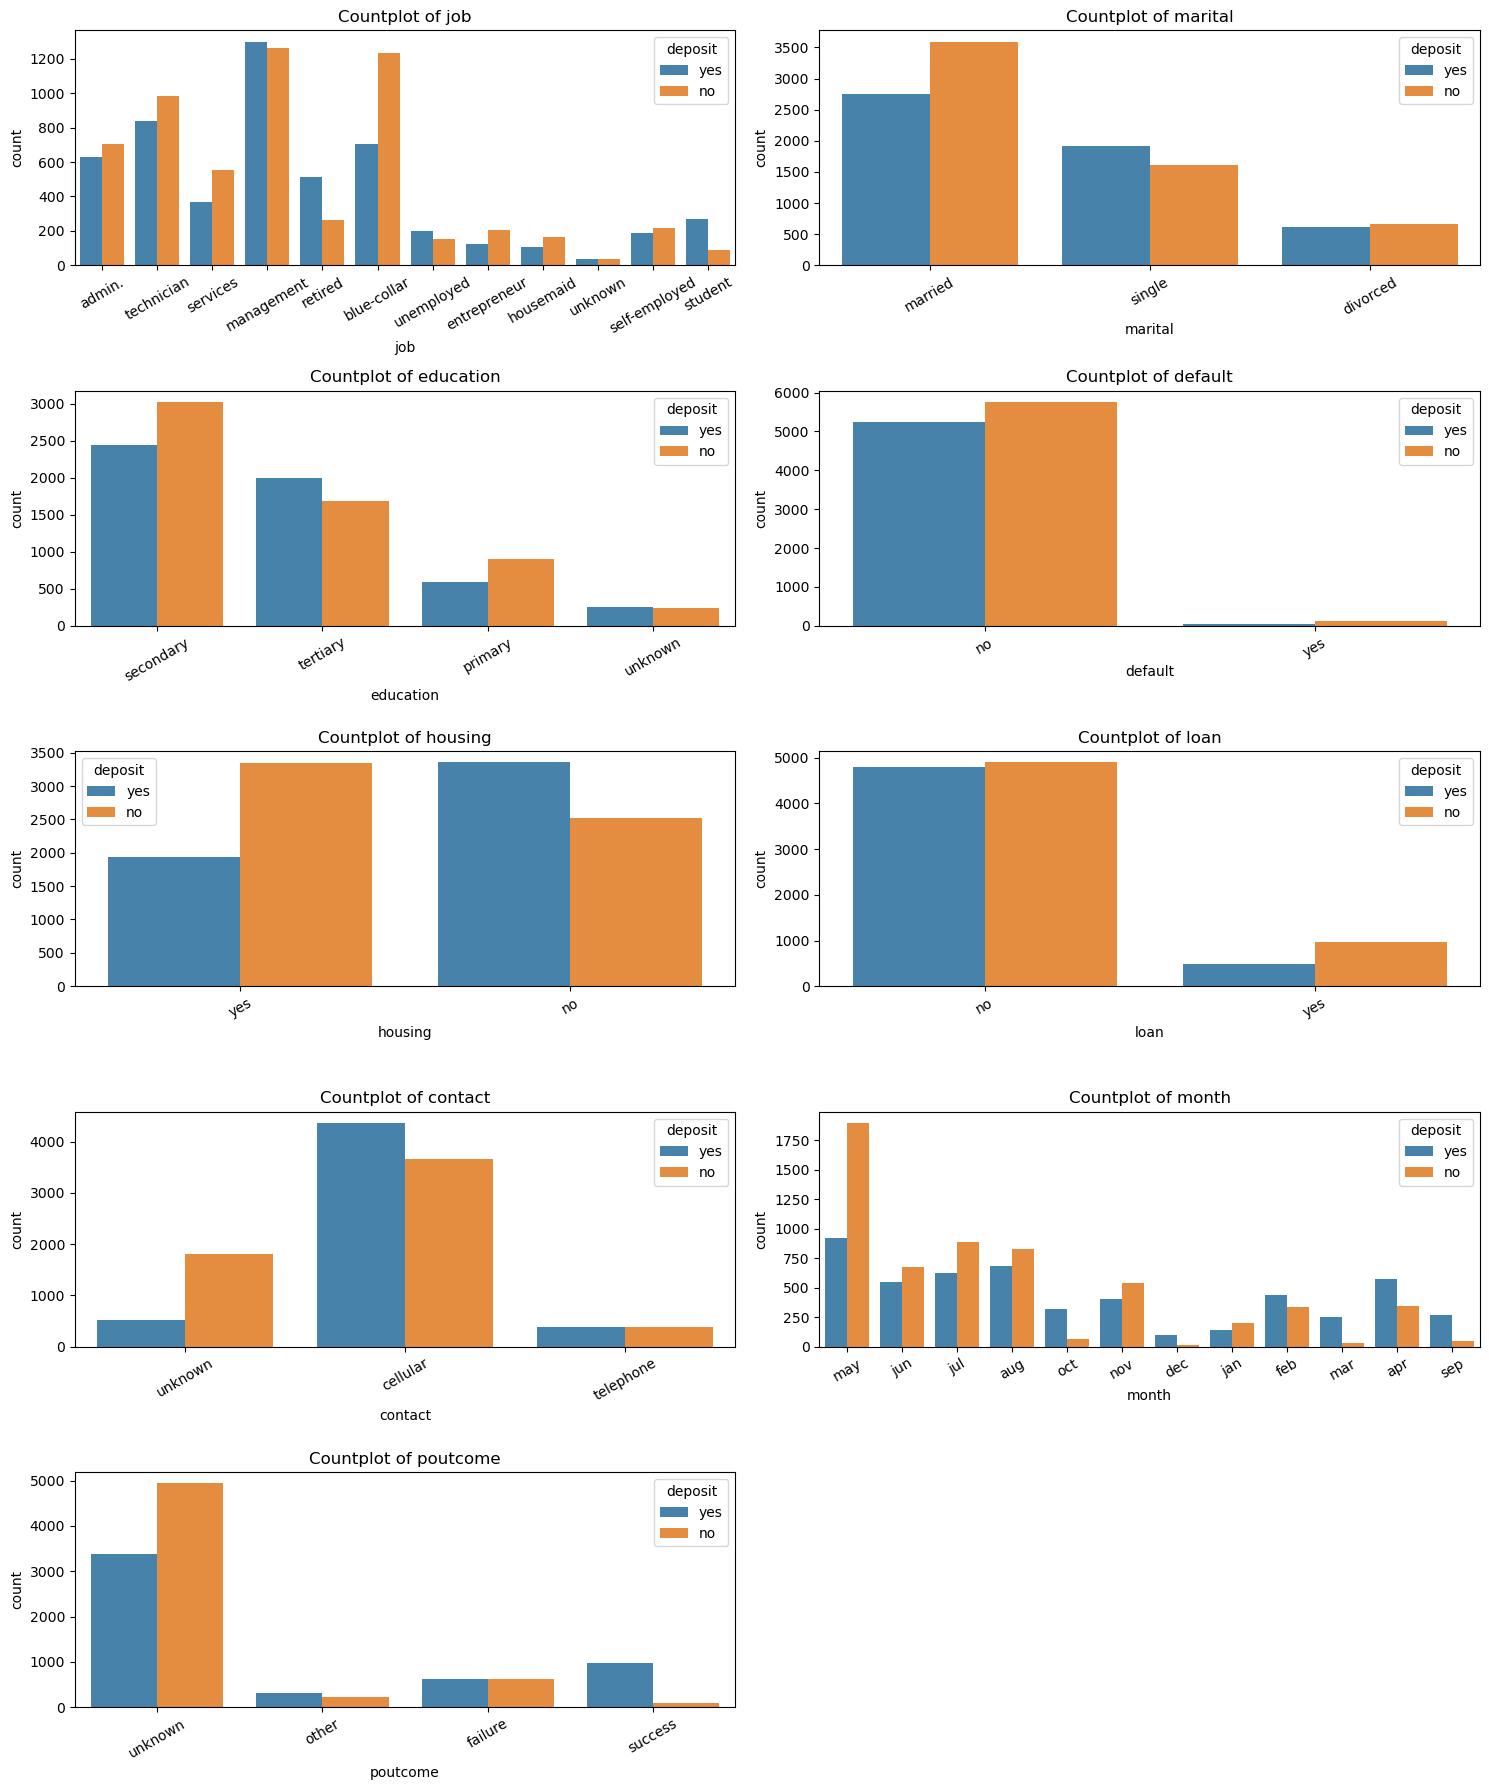

In [289]:
plt.figure(figsize=[15,18])

features= ["job","marital","education","default","housing","loan","contact","month","poutcome"]

n=1
for f in features: 
    plt.subplot(5,2,n) # First figure our numbr of plots in each row, accordingly write the no of rows. 
                       # Here, 9 rows, 1 plots in each row, n represents the index of the subplot, which is updated in 
                       # each iteration.
        
    sns.countplot(x=f,hue="deposit", alpha=0.9, data=data)
# We are using seaborn's countplot() function to create a countplot, the 'x' parameter is set to the current feature 'f'
    # to plot the distribution. The 'hue' parameter is set to 'target' to distinguish the count of categories based on the 
    # target variable. The 'alpha' parameter controls the transperency of the bars making them slightly transparent for
    # better visualization.
    
    plt.title('Countplot of {}'.format(f))
# This line sets the title of the subplot indicating the feature name and it's distribution with respect to the target 
    # variable.
    
    n= n+1 
    plt.xticks(rotation=30)

plt.tight_layout() # Ensures that the plots are properly arranged within the figure without any overlapping. 

plt.show()

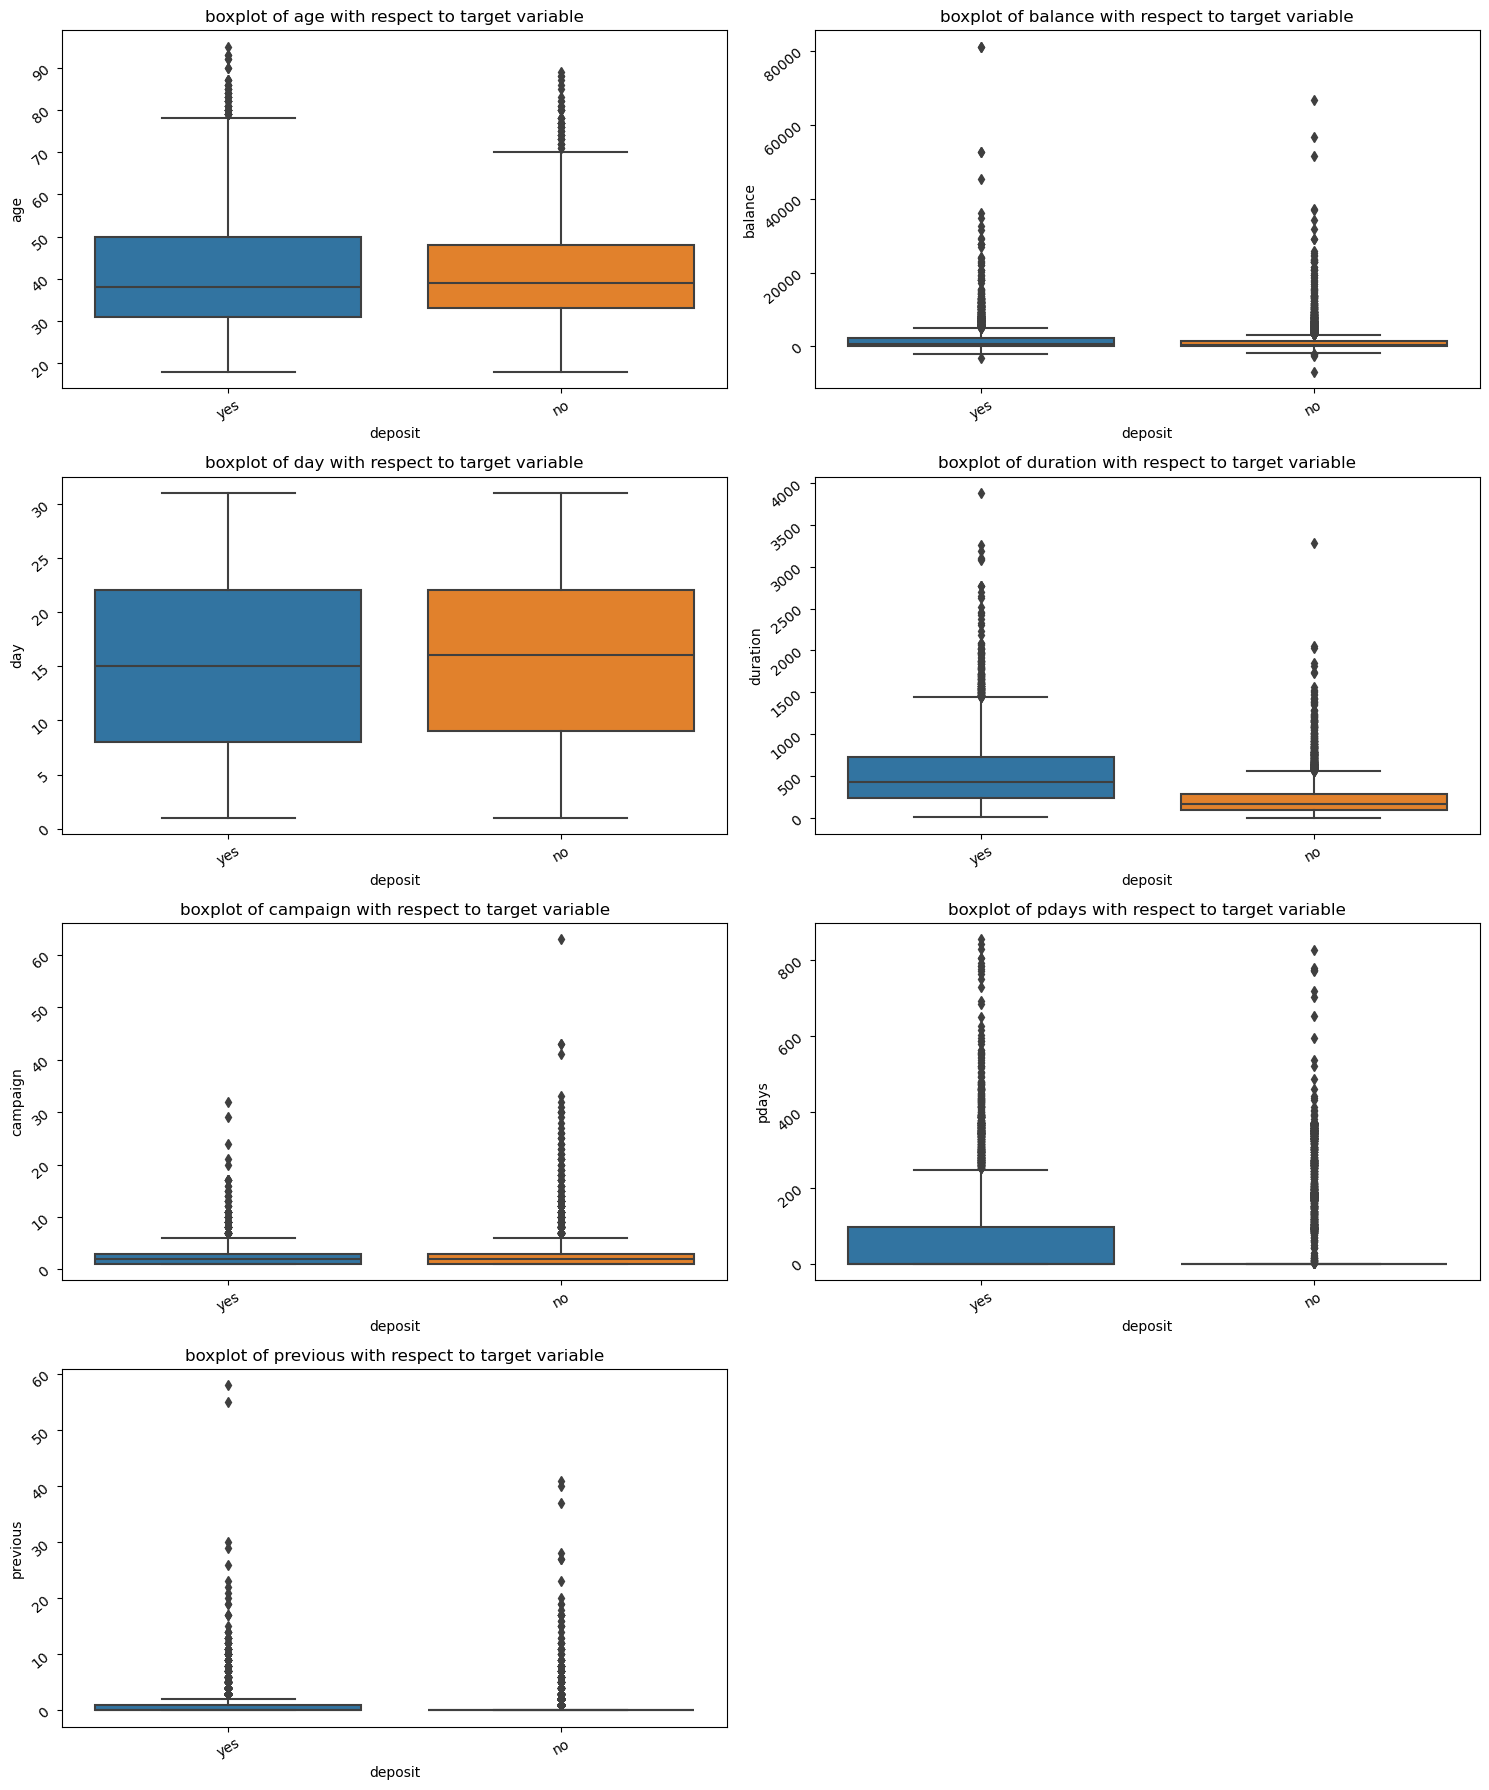

In [290]:
plt.figure(figsize=[15,18])

features= ["age","balance","day","duration","campaign","pdays","previous"]

n=1
for f in features: 
    plt.subplot(4,2,n) # First figure our numbr of plots in each row, accordingly write the no of rows. 
                       # Here, 4 rows, 2 plots in each row, n represents the index of the subplot, which is updated in 
                       # each iteration.
        
    sns.boxplot(x="deposit",y=f, data=data)
# We are using seaborn's boxtplot() function to create a boxtplot, the 'x' parameter is set to the current feature 'f'
    # to plot the distribution. 
    
    plt.title('boxplot of {} with respect to target variable'.format(f))
# This line sets the title of the subplot indicating the feature name and it's distribution with respect to the target 
    # variable.
    
    n= n+1 
    plt.xticks(rotation=30)
    plt.yticks(rotation=40)

plt.tight_layout() # Ensures that the plots are properly arranged within the figure without any overlapping. 

plt.show()

In [291]:
#checking the number of missing values

In [292]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [293]:
#there are no missing values in this dataset 

In [294]:
#number of deposit:  no=5873 & yes=5289 this is almost same to each other hense the dataset is balanced

In [295]:
#check if outliers are present when we compare age againts deposit 

<Axes: xlabel='deposit', ylabel='age'>

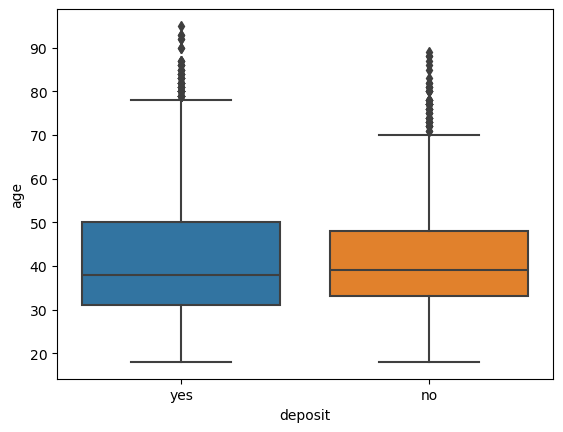

In [296]:
sns.boxplot(x='deposit',y='age',data=data)

In [297]:
#check outliers while comparing balance against deposit

<Axes: xlabel='deposit', ylabel='balance'>

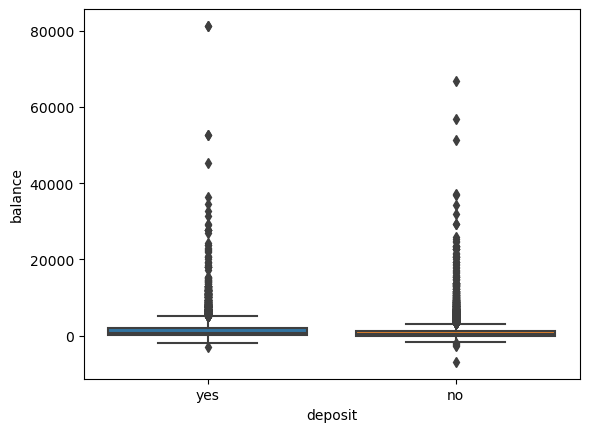

In [298]:
sns.boxplot(x='deposit',y='balance',data=data)

In [299]:
#day againts deposit

<Axes: xlabel='deposit', ylabel='day'>

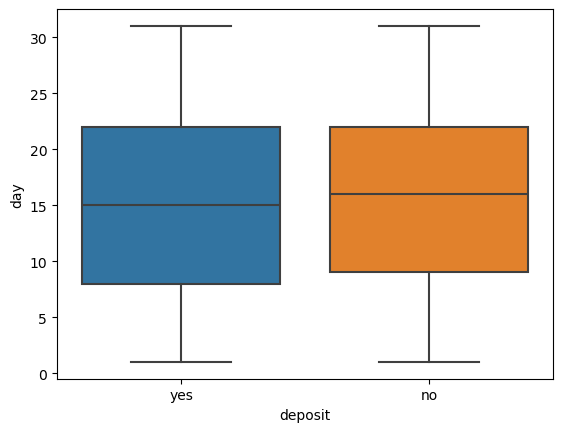

In [300]:
sns.boxplot(x='deposit',y='day',data=data)

In [301]:
#duration againts deposit 

<Axes: xlabel='deposit', ylabel='duration'>

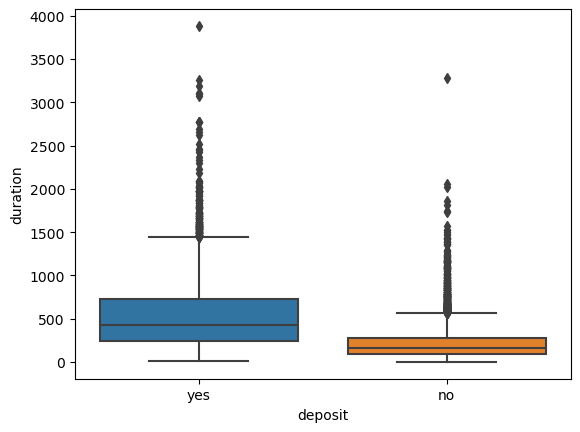

In [302]:
sns.boxplot(x='deposit',y='duration',data=data)

In [303]:
#campaign againts deposit

<Axes: xlabel='deposit', ylabel='campaign'>

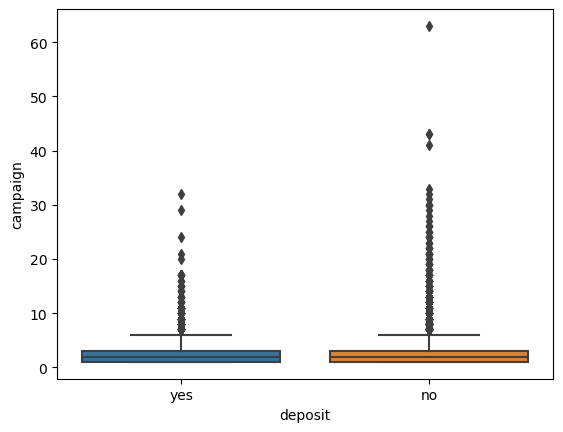

In [304]:
sns.boxplot(x='deposit',y='campaign',data=data)

In [305]:
#pdays againt deposit

<Axes: xlabel='deposit', ylabel='pdays'>

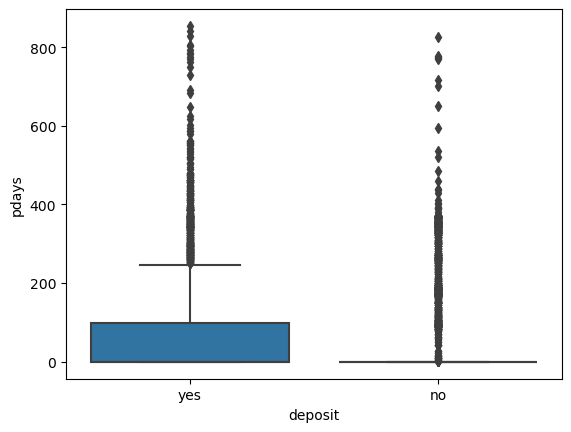

In [306]:
sns.boxplot(x='deposit',y='pdays',data=data)

In [307]:
#previous againts deposit

<Axes: xlabel='deposit', ylabel='previous'>

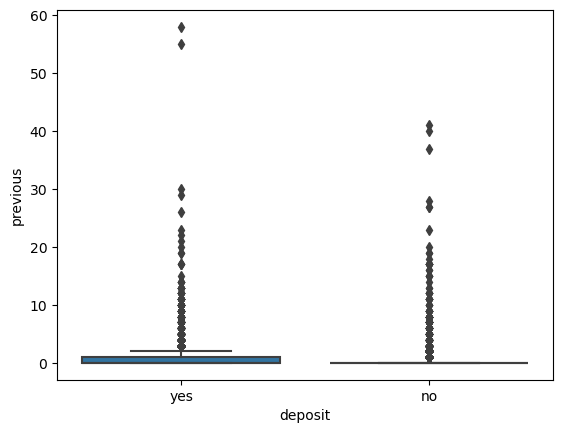

In [309]:
sns.boxplot(x='deposit',y='previous',data=data)

In [310]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [311]:
numerical_columns=["age","balance","day","duration","campaign","pdays","previous"]

In [312]:
numerical_df = data[numerical_columns + ['deposit']]
numerical_df

,age,balance,day,duration,campaign,pdays,previous,deposit
0,59,2343,5,1042,1,-1,0,yes
1,56,45,5,1467,1,-1,0,yes
2,41,1270,5,1389,1,-1,0,yes
3,55,2476,5,579,1,-1,0,yes
4,54,184,5,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,no
11158,39,733,16,83,4,-1,0,no
11159,32,29,19,156,2,-1,0,no
11160,43,0,8,9,2,172,5,no


In [313]:
numerical_df.groupby('deposit').median()

,age,balance,day,duration,campaign,pdays,previous
deposit,,,,,,,
no,39.0,414.0,16.0,163.0,2.0,-1.0,0.0
yes,38.0,733.0,15.0,426.0,2.0,-1.0,0.0


In [314]:
#we have outliers in the dataset colomns we agregate to median 

In [315]:
#checking the distribution of duration columns

C:\Users\yasmi\AppData\Local\Temp\ipykernel_12200\597439449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.duration,bins=15)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='duration', ylabel='Density'>

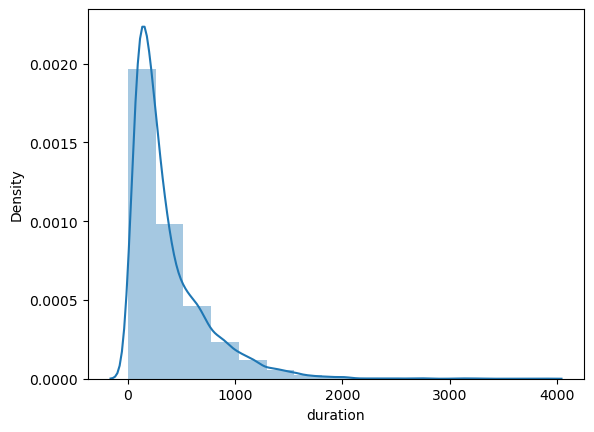

In [316]:
sns.distplot(data.duration,bins=15)

In [317]:
#longer right teal hense it is positif destributuon 

In [318]:
#checking the distribution of balance columns

C:\Users\yasmi\AppData\Local\Temp\ipykernel_12200\3115488645.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.balance,bins=15)
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='balance', ylabel='Density'>

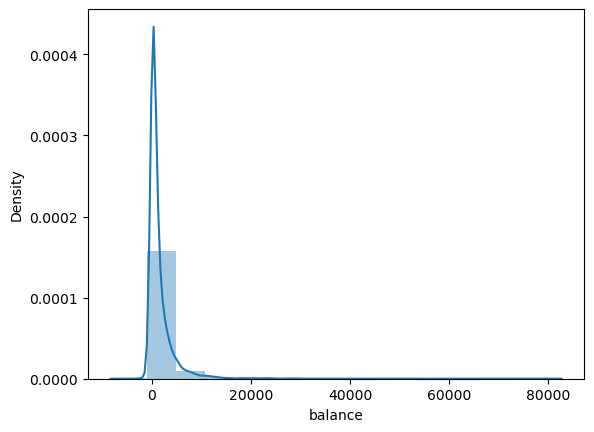

In [319]:
sns.distplot(data.balance,bins=15)

In [320]:
#longer right teal hense it is positif destributuon 

In [327]:
jobs = data['job'].unique()
jobs

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [328]:
#we are checking here the percentage of deposit = yes category within each of job categories for which they are creating a listwith diferent job categories

In [331]:
jobs=['management','blue-collar','technician','admin.','services','retired','self-employed','student','unemployed','entrepreneur','housemaid','unknown']

In [332]:
for j in jobs:
    print("{:20} : {:10}". format(j, len(data[(data.deposit == "yes") 
                                               & (data.job ==j)])))

management           :       1301
blue-collar          :        708
technician           :        840
admin.               :        631
services             :        369
retired              :        516
self-employed        :        187
student              :        269
unemployed           :        202
entrepreneur         :        123
housemaid            :        109
unknown              :         34


In [335]:
data.job.value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [336]:
#ouf of 2566 people in management we have 1301 deposit = yes , blue-collar out of 1944 people in blue collar we have a deposit of 708 and so on .....

In [339]:
#counting the percentage of deposit =yes category for each job of categories 

In [340]:
total_entries=len(data)

In [343]:
for j in jobs:
    # Count the number of 'deposit=yes' for the current job category
    deposit_yes_count = len(data[(data.deposit == "yes") & (data.job == j)])
    
    # Calculate the percentage
    percentage = (deposit_yes_count / total_entries) * 100
    
    # Print the result
    print("{:20} : {:10} : {:5.2f}%".format(j, deposit_yes_count, percentage))

management           :       1301 : 11.66%
blue-collar          :        708 :  6.34%
technician           :        840 :  7.53%
admin.               :        631 :  5.65%
services             :        369 :  3.31%
retired              :        516 :  4.62%
self-employed        :        187 :  1.68%
student              :        269 :  2.41%
unemployed           :        202 :  1.81%
entrepreneur         :        123 :  1.10%
housemaid            :        109 :  0.98%
unknown              :         34 :  0.30%


In [344]:
#count the percentage of deposit =no category for each of the unique jobs 

In [347]:
for j in jobs:
    # Count the number of 'deposit=yes' for the current job category
    deposit_no_count = len(data[(data.deposit == "no") & (data.job == j)])
    
    # Calculate the percentage
    percentage = (deposit_no_count / total_entries) * 100
    
    # Print the result
    print("{:20} : {:10} : {:5.2f}%".format(j, deposit_no_count, percentage))

management           :       1265 : 11.33%
blue-collar          :       1236 : 11.07%
technician           :        983 :  8.81%
admin.               :        703 :  6.30%
services             :        554 :  4.96%
retired              :        262 :  2.35%
self-employed        :        218 :  1.95%
student              :         91 :  0.82%
unemployed           :        155 :  1.39%
entrepreneur         :        205 :  1.84%
housemaid            :        165 :  1.48%
unknown              :         36 :  0.32%


In [350]:
#count the percentage of the housing =yes for each job categories to understand which category is taking maximum amount of housing loan 

In [351]:
for j in jobs:
    # Count the number of 'deposit=yes' for the current job category
    housing_yes_count = len(data[(data.housing == "yes") & (data.job == j)])
    
    # Calculate the percentage
    percentage = (housing_yes_count / total_entries) * 100
    
    # Print the result
    print("{:20} : {:10} : {:5.2f}%".format(j, housing_yes_count, percentage))

management           :       1073 :  9.61%
blue-collar          :       1321 : 11.83%
technician           :        876 :  7.85%
admin.               :        740 :  6.63%
services             :        566 :  5.07%
retired              :        123 :  1.10%
self-employed        :        174 :  1.56%
student              :         51 :  0.46%
unemployed           :        112 :  1.00%
entrepreneur         :        166 :  1.49%
housemaid            :         76 :  0.68%
unknown              :          3 :  0.03%


In [353]:
#combaning the similar jobs into categories such that we can clean the number of buckets thereby helping better analysis for exemple : admin job is also of atype of a management job so we can combine both of them housemaid is a type of service provider sp we can combine services .
#retired, student, unemployed, unknown all can be combined 

In [358]:
data['job'] = data['job'].replace(['management', 'admin.'], 'white-collar')

In [361]:
data['job'] = data['job'].replace(['retired', 'student','unemployed','unknown'], 'pink-collar')

In [362]:
data['job'] = data['job'].replace(['services', 'housemaid'], 'black-collar')

In [366]:
data['job'].value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
pink-collar      1565
black-collar     1197
self-employed     405
entrepreneur      328
Name: count, dtype: int64

In [367]:
jobs1=['white-collar','blue-collar','technician','black-collar','self-employed','entrepreneur','pink-collar']

In [368]:
for j in jobs1:
    # Count the number of 'deposit=yes' for the current job category
    housing_yes_count = len(data[(data.housing == "yes") & (data.job == j)])
    
    # Calculate the percentage
    percentage = (housing_yes_count / total_entries) * 100
    
    # Print the result
    print("{:20} : {:10} : {:5.2f}%".format(j, housing_yes_count, percentage))

white-collar         :       1813 : 16.24%
blue-collar          :       1321 : 11.83%
technician           :        876 :  7.85%
black-collar         :        642 :  5.75%
self-employed        :        174 :  1.56%
entrepreneur         :        166 :  1.49%
pink-collar          :        289 :  2.59%


In [371]:
for j in jobs1:
    # Count the number of 'deposit=yes' for the current job category
    housing_no_count = len(data[(data.housing == "no") & (data.job == j)])
    
    # Calculate the percentage
    percentage = (housing_no_count / total_entries) * 100
    
    # Print the result
    print("{:20} : {:10} : {:5.2f}%".format(j, housing_no_count, percentage))

white-collar         :       2087 : 18.70%
blue-collar          :        623 :  5.58%
technician           :        947 :  8.48%
black-collar         :        555 :  4.97%
self-employed        :        231 :  2.07%
entrepreneur         :        162 :  1.45%
pink-collar          :       1276 : 11.43%


In [372]:
for j in jobs1:
    # Count the number of 'deposit=yes' for the current job category
    deposit_yes_count = len(data[(data.deposit == "yes") & (data.job == j)])
    
    # Calculate the percentage
    percentage = (deposit_yes_count / total_entries) * 100
    
    # Print the result 
    print("{:20} : {:10} : {:5.2f}%".format(j, deposit_yes_count, percentage))

white-collar         :       1932 : 17.31%
blue-collar          :        708 :  6.34%
technician           :        840 :  7.53%
black-collar         :        478 :  4.28%
self-employed        :        187 :  1.68%
entrepreneur         :        123 :  1.10%
pink-collar          :       1021 :  9.15%


In [375]:
for j in jobs1:
    # Count the number of 'deposit=yes' for the current job category
    deposit_no_count = len(data[(data.deposit == "no") & (data.job == j)])
    
    # Calculate the percentage
    percentage = (deposit_no_count / total_entries) * 100
    
    # Print the result
    print("{:20} : {:10} : {:5.2f}%".format(j, deposit_no_count, percentage))

white-collar         :       1968 : 17.63%
blue-collar          :       1236 : 11.07%
technician           :        983 :  8.81%
black-collar         :        719 :  6.44%
self-employed        :        218 :  1.95%
entrepreneur         :        205 :  1.84%
pink-collar          :        544 :  4.87%


In [377]:
#find out the distinct categories in poutcome column

In [379]:
data.poutcome.value_counts()

poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: count, dtype: int64

In [383]:
#combine other and unknown categories to extra

In [385]:
data['poutcome'] = data['poutcome'].replace(['unknown', 'other'], 'extra')

In [388]:
data.poutcome.value_counts()

poutcome
extra      8863
failure    1228
success    1071
Name: count, dtype: int64

In [390]:
#we can drop the day,month and contact fron the data set as day and month signify respectvely the last contact day of the month and last contact month of the year which is not important for the bank to understand if the custmer will do deposit or not. hence we can drop the columns day and month . we can also drop contact column as every participant has been contacted in some or the other way 

In [394]:
data.drop(['day','month','contact'], axis=1, inplace=True)

In [395]:
data

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,1042,1,-1,0,extra,yes
1,56,white-collar,married,secondary,no,45,no,no,1467,1,-1,0,extra,yes
2,41,technician,married,secondary,no,1270,yes,no,1389,1,-1,0,extra,yes
3,55,black-collar,married,secondary,no,2476,yes,no,579,1,-1,0,extra,yes
4,54,white-collar,married,tertiary,no,184,no,no,673,2,-1,0,extra,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,257,1,-1,0,extra,no
11158,39,black-collar,married,secondary,no,733,no,no,83,4,-1,0,extra,no
11159,32,technician,single,secondary,no,29,no,no,156,2,-1,0,extra,no
11160,43,technician,married,secondary,no,0,no,yes,9,2,172,5,failure,no


In [399]:
#how many distinct categories are there for label endocding 

In [400]:
data.poutcome.value_counts()

poutcome
extra      8863
failure    1228
success    1071
Name: count, dtype: int64

In [404]:
data.deposit.value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [407]:
data.loan.value_counts()

loan
no     9702
yes    1460
Name: count, dtype: int64

In [410]:
data.housing.value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

In [412]:
data.default.value_counts()

default
no     10994
yes      168
Name: count, dtype: int64

In [415]:
data.education.value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [417]:
data.marital.value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [419]:
data.job.value_counts()

job
white-collar     3900
blue-collar      1944
technician       1823
pink-collar      1565
black-collar     1197
self-employed     405
entrepreneur      328
Name: count, dtype: int64

In [422]:
#ordinal encoding 

In [425]:
data['default_cat'] = data['default'].map({'yes':1, 'no':0})
data.drop('default', axis=1,inplace = True)

In [428]:
data

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,white-collar,married,secondary,2343,yes,no,1042,1,-1,0,extra,yes,0
1,56,white-collar,married,secondary,45,no,no,1467,1,-1,0,extra,yes,0
2,41,technician,married,secondary,1270,yes,no,1389,1,-1,0,extra,yes,0
3,55,black-collar,married,secondary,2476,yes,no,579,1,-1,0,extra,yes,0
4,54,white-collar,married,tertiary,184,no,no,673,2,-1,0,extra,yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,257,1,-1,0,extra,no,0
11158,39,black-collar,married,secondary,733,no,no,83,4,-1,0,extra,no,0
11159,32,technician,single,secondary,29,no,no,156,2,-1,0,extra,no,0
11160,43,technician,married,secondary,0,no,yes,9,2,172,5,failure,no,0


In [430]:
data['deposit_cat'] = data['deposit'].map({'yes':1, 'no':0})
data.drop('deposit', axis=1,inplace = True)

In [433]:
data

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,poutcome,default_cat,deposit_cat
0,59,white-collar,married,secondary,2343,yes,no,1042,1,-1,0,extra,0,1
1,56,white-collar,married,secondary,45,no,no,1467,1,-1,0,extra,0,1
2,41,technician,married,secondary,1270,yes,no,1389,1,-1,0,extra,0,1
3,55,black-collar,married,secondary,2476,yes,no,579,1,-1,0,extra,0,1
4,54,white-collar,married,tertiary,184,no,no,673,2,-1,0,extra,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,257,1,-1,0,extra,0,0
11158,39,black-collar,married,secondary,733,no,no,83,4,-1,0,extra,0,0
11159,32,technician,single,secondary,29,no,no,156,2,-1,0,extra,0,0
11160,43,technician,married,secondary,0,no,yes,9,2,172,5,failure,0,0


In [437]:
data['poutcome_cat'] = data['poutcome'].map({'success':1, 'failure':0,'extra':2})
data.drop('poutcome', axis=1,inplace = True)

In [439]:
data

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,previous,default_cat,deposit_cat,poutcome_cat
0,59,white-collar,married,secondary,2343,yes,no,1042,1,-1,0,0,1,2
1,56,white-collar,married,secondary,45,no,no,1467,1,-1,0,0,1,2
2,41,technician,married,secondary,1270,yes,no,1389,1,-1,0,0,1,2
3,55,black-collar,married,secondary,2476,yes,no,579,1,-1,0,0,1,2
4,54,white-collar,married,tertiary,184,no,no,673,2,-1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,257,1,-1,0,0,0,2
11158,39,black-collar,married,secondary,733,no,no,83,4,-1,0,0,0,2
11159,32,technician,single,secondary,29,no,no,156,2,-1,0,0,0,2
11160,43,technician,married,secondary,0,no,yes,9,2,172,5,0,0,0


In [442]:
data['loan_cat'] = data['loan'].map({'yes':1, 'no':0})
data.drop('loan', axis=1,inplace = True)

In [445]:
data

,age,job,marital,education,balance,housing,duration,campaign,pdays,previous,default_cat,deposit_cat,poutcome_cat,loan_cat
0,59,white-collar,married,secondary,2343,yes,1042,1,-1,0,0,1,2,0
1,56,white-collar,married,secondary,45,no,1467,1,-1,0,0,1,2,0
2,41,technician,married,secondary,1270,yes,1389,1,-1,0,0,1,2,0
3,55,black-collar,married,secondary,2476,yes,579,1,-1,0,0,1,2,0
4,54,white-collar,married,tertiary,184,no,673,2,-1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,257,1,-1,0,0,0,2,0
11158,39,black-collar,married,secondary,733,no,83,4,-1,0,0,0,2,0
11159,32,technician,single,secondary,29,no,156,2,-1,0,0,0,2,0
11160,43,technician,married,secondary,0,no,9,2,172,5,0,0,0,1


In [448]:
data['housing_cat'] = data['housing'].map({'yes':1, 'no':0})
data.drop('housing', axis=1,inplace = True)

In [451]:
data

,age,job,marital,education,balance,duration,campaign,pdays,previous,default_cat,deposit_cat,poutcome_cat,loan_cat,housing_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,0,1,2,0,1
1,56,white-collar,married,secondary,45,1467,1,-1,0,0,1,2,0,0
2,41,technician,married,secondary,1270,1389,1,-1,0,0,1,2,0,1
3,55,black-collar,married,secondary,2476,579,1,-1,0,0,1,2,0,1
4,54,white-collar,married,tertiary,184,673,2,-1,0,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,257,1,-1,0,0,0,2,0,1
11158,39,black-collar,married,secondary,733,83,4,-1,0,0,0,2,0,0
11159,32,technician,single,secondary,29,156,2,-1,0,0,0,2,0,0
11160,43,technician,married,secondary,0,9,2,172,5,0,0,0,1,0


In [453]:
data['marital_cat'] = data['marital'].map({'married':1, 'divorced':0,'single':2})
data.drop('marital', axis=1,inplace = True)

In [455]:
data

,age,job,education,balance,duration,campaign,pdays,previous,default_cat,deposit_cat,poutcome_cat,loan_cat,housing_cat,marital_cat
0,59,white-collar,secondary,2343,1042,1,-1,0,0,1,2,0,1,1
1,56,white-collar,secondary,45,1467,1,-1,0,0,1,2,0,0,1
2,41,technician,secondary,1270,1389,1,-1,0,0,1,2,0,1,1
3,55,black-collar,secondary,2476,579,1,-1,0,0,1,2,0,1,1
4,54,white-collar,tertiary,184,673,2,-1,0,0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,primary,1,257,1,-1,0,0,0,2,0,1,2
11158,39,black-collar,secondary,733,83,4,-1,0,0,0,2,0,0,1
11159,32,technician,secondary,29,156,2,-1,0,0,0,2,0,0,2
11160,43,technician,secondary,0,9,2,172,5,0,0,0,1,0,1


In [457]:
#one hotencoding for columns job and education 

In [459]:
data_new= pd.get_dummies(data=data, columns=['job','education'], prefix=['job','education'])

In [461]:
data_new

,age,balance,duration,campaign,pdays,previous,default_cat,deposit_cat,poutcome_cat,loan_cat,...,job_blue-collar,job_entrepreneur,job_pink-collar,job_self-employed,job_technician,job_white-collar,education_primary,education_secondary,education_tertiary,education_unknown
0,59,2343,1042,1,-1,0,0,1,2,0,...,False,False,False,False,False,True,False,True,False,False
1,56,45,1467,1,-1,0,0,1,2,0,...,False,False,False,False,False,True,False,True,False,False
2,41,1270,1389,1,-1,0,0,1,2,0,...,False,False,False,False,True,False,False,True,False,False
3,55,2476,579,1,-1,0,0,1,2,0,...,False,False,False,False,False,False,False,True,False,False
4,54,184,673,2,-1,0,0,1,2,0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,-1,0,0,0,2,0,...,True,False,False,False,False,False,True,False,False,False
11158,39,733,83,4,-1,0,0,0,2,0,...,False,False,False,False,False,False,False,True,False,False
11159,32,29,156,2,-1,0,0,0,2,0,...,False,False,False,False,True,False,False,True,False,False
11160,43,0,9,2,172,5,0,0,0,1,...,False,False,False,False,True,False,False,True,False,False


In [463]:
data_new.astype('int')

,age,balance,duration,campaign,pdays,previous,default_cat,deposit_cat,poutcome_cat,loan_cat,...,job_blue-collar,job_entrepreneur,job_pink-collar,job_self-employed,job_technician,job_white-collar,education_primary,education_secondary,education_tertiary,education_unknown
0,59,2343,1042,1,-1,0,0,1,2,0,...,0,0,0,0,0,1,0,1,0,0
1,56,45,1467,1,-1,0,0,1,2,0,...,0,0,0,0,0,1,0,1,0,0
2,41,1270,1389,1,-1,0,0,1,2,0,...,0,0,0,0,1,0,0,1,0,0
3,55,2476,579,1,-1,0,0,1,2,0,...,0,0,0,0,0,0,0,1,0,0
4,54,184,673,2,-1,0,0,1,2,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,-1,0,0,0,2,0,...,1,0,0,0,0,0,1,0,0,0
11158,39,733,83,4,-1,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
11159,32,29,156,2,-1,0,0,0,2,0,...,0,0,0,0,1,0,0,1,0,0
11160,43,0,9,2,172,5,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [465]:
data_new.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'default_cat', 'deposit_cat', 'poutcome_cat', 'loan_cat', 'housing_cat',
       'marital_cat', 'job_black-collar', 'job_blue-collar',
       'job_entrepreneur', 'job_pink-collar', 'job_self-employed',
       'job_technician', 'job_white-collar', 'education_primary',
       'education_secondary', 'education_tertiary', 'education_unknown'],
      dtype='object')

In [467]:
#data encoded properly 

In [469]:
#dividing the data set into X & Y such that we can apply features scaling on X 

In [471]:
X=data_new.drop('deposit_cat', axis=1)

In [473]:
X

,age,balance,duration,campaign,pdays,previous,default_cat,poutcome_cat,loan_cat,housing_cat,...,job_blue-collar,job_entrepreneur,job_pink-collar,job_self-employed,job_technician,job_white-collar,education_primary,education_secondary,education_tertiary,education_unknown
0,59,2343,1042,1,-1,0,0,2,0,1,...,False,False,False,False,False,True,False,True,False,False
1,56,45,1467,1,-1,0,0,2,0,0,...,False,False,False,False,False,True,False,True,False,False
2,41,1270,1389,1,-1,0,0,2,0,1,...,False,False,False,False,True,False,False,True,False,False
3,55,2476,579,1,-1,0,0,2,0,1,...,False,False,False,False,False,False,False,True,False,False
4,54,184,673,2,-1,0,0,2,0,0,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,-1,0,0,2,0,1,...,True,False,False,False,False,False,True,False,False,False
11158,39,733,83,4,-1,0,0,2,0,0,...,False,False,False,False,False,False,False,True,False,False
11159,32,29,156,2,-1,0,0,2,0,0,...,False,False,False,False,True,False,False,True,False,False
11160,43,0,9,2,172,5,0,0,1,0,...,False,False,False,False,True,False,False,True,False,False


In [475]:
Y=data_new['deposit_cat']

In [477]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit_cat, Length: 11162, dtype: int64

In [479]:
#apply features scaling on X (preprocessing is the library)

In [481]:
from sklearn.preprocessing import MinMaxScaler

In [483]:
scaler = MinMaxScaler()

In [485]:
scaled_data = scaler.fit_transform(X)

In [487]:
scaled_X = pd.DataFrame(scaled_data, 
                         columns=X.columns)

In [489]:
scaled_X

,age,balance,duration,campaign,pdays,previous,default_cat,poutcome_cat,loan_cat,housing_cat,...,job_blue-collar,job_entrepreneur,job_pink-collar,job_self-employed,job_technician,job_white-collar,education_primary,education_secondary,education_tertiary,education_unknown
0,0.532468,0.104371,0.268110,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.493506,0.078273,0.377675,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.298701,0.092185,0.357566,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.480519,0.105882,0.148750,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.467532,0.079851,0.172983,0.016129,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,0.194805,0.077773,0.065739,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11158,0.272727,0.086086,0.020882,0.048387,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11159,0.181818,0.078091,0.039701,0.016129,0.000000,0.000000,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
11160,0.324675,0.077762,0.001805,0.016129,0.202339,0.086207,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [491]:
#breaking dataset to train and test to 75% train data and 25% test data

In [493]:
from sklearn.model_selection import train_test_split

In [495]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,test_size=0.25, random_state=91)

In [497]:
#apply the model on train data after importing the same

In [499]:
X_train, X_test, Y_train, Y_test

(            age   balance  duration  campaign     pdays  previous  \
 7783   0.168831  0.091640  0.047435  0.032258  0.000000  0.000000   
 9213   0.259740  0.072106  0.021397  0.080645  0.000000  0.000000   
 6871   0.311688  0.101725  0.026811  0.016129  0.000000  0.000000   
 1797   0.168831  0.079988  0.145914  0.000000  0.400000  0.120690   
 2594   0.324675  0.102123  0.074504  0.016129  0.112281  0.068966   
 ...         ...       ...       ...       ...       ...       ...   
 494    0.311688  0.081180  0.302398  0.016129  0.000000  0.000000   
 6260   0.285714  0.072924  0.062645  0.000000  0.000000  0.000000   
 10077  0.324675  0.136500  0.014179  0.032258  0.000000  0.000000   
 210    0.311688  0.064940  0.142563  0.064516  0.000000  0.000000   
 1710   0.376623  0.078738  0.099252  0.032258  0.102924  0.017241   
 
        default_cat  poutcome_cat  loan_cat  housing_cat  ...  job_blue-collar  \
 7783           0.0           1.0       0.0          1.0  ...              0

In [501]:
#building the model

In [503]:
from sklearn.linear_model import LogisticRegression

In [505]:
lr=LogisticRegression(solver='liblinear')

In [507]:
#applying the saved instence lr with the help of train data to train the model based on historical paterns 

In [509]:
lr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [511]:
#examin the data and predict based on test data

In [513]:
Y_pred=lr.predict(X_test)

In [515]:
Y_pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [517]:
#there is a clear scenario of overfitting 

In [519]:
#finding the accuracy of the model results (metrics is the library)

In [521]:
from sklearn import metrics

In [523]:
from sklearn.metrics import accuracy_score

In [525]:
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7839484055893945


In [527]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

In [529]:
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7839484055893945


In [531]:
print('precision_score:',metrics.precision_score(Y_test, Y_pred))

precision_score: 0.7936254980079681


In [533]:
print('recall_score:',metrics.recall_score(Y_test, Y_pred))

recall_score: 0.7432835820895523


In [535]:
print('f1:',metrics.f1_score(Y_test, Y_pred))

f1: 0.7676300578034683


In [537]:
#precision score higher than recall score 

In [539]:
#classification matrix - confusion matrix 

In [541]:
from sklearn.metrics import classification_report

In [543]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1451
           1       0.79      0.74      0.77      1340

    accuracy                           0.78      2791
   macro avg       0.78      0.78      0.78      2791
weighted avg       0.78      0.78      0.78      2791



In [545]:
#applying decision tree in a classifier model

In [547]:
# Initialize the model

In [549]:
from sklearn.tree import DecisionTreeClassifier

In [551]:
clf = DecisionTreeClassifier(random_state=42)

In [553]:
# Train the model

In [603]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [556]:
# Predict on the test set

In [559]:
Y_pred = clf.predict(X_test)

In [609]:
clf.score(X_test, Y_test)

1.0

In [611]:
clf.score(X_train, Y_train)

0.725480826663481

In [ ]:
##we have much overfitting because there is a huge gap between train score and test score while building decision tree model so apply costumization of paraneters 

In [607]:
# Evaluate the model

In [563]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))
print("\nAccuracy Score:")
print(accuracy_score(Y_test, Y_pred))

Confusion Matrix:
[[1072  379]
 [ 349  991]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1451
           1       0.72      0.74      0.73      1340

    accuracy                           0.74      2791
   macro avg       0.74      0.74      0.74      2791
weighted avg       0.74      0.74      0.74      2791


Accuracy Score:
0.7391615908276603


In [569]:
#apply hyperparameter tuning to resolve the overfitting scenario of the decision tree as much as possible 

In [571]:
# Initialize the model

In [573]:
clf = DecisionTreeClassifier(random_state=42)

In [575]:
# With Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [577]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [579]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [581]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [582]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Score: 0.7967985877066283


In [583]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [584]:
#cv is cross validation

In [585]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [586]:
# Evaluate the best model using cross-validation
best_clf = grid_search.best_estimator_
cv_scores = cross_val_score(best_clf, X, Y, cv=cv, scoring='accuracy')

In [587]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv_scores)
print("Mean Cross-Validation Score (Best Model):", cv_scores.mean())

Cross-Validation Scores (Best Model): [0.80206001 0.79355128 0.79883513 0.80062724 0.7921147 ]
Mean Cross-Validation Score (Best Model): 0.7974376692396714


In [588]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

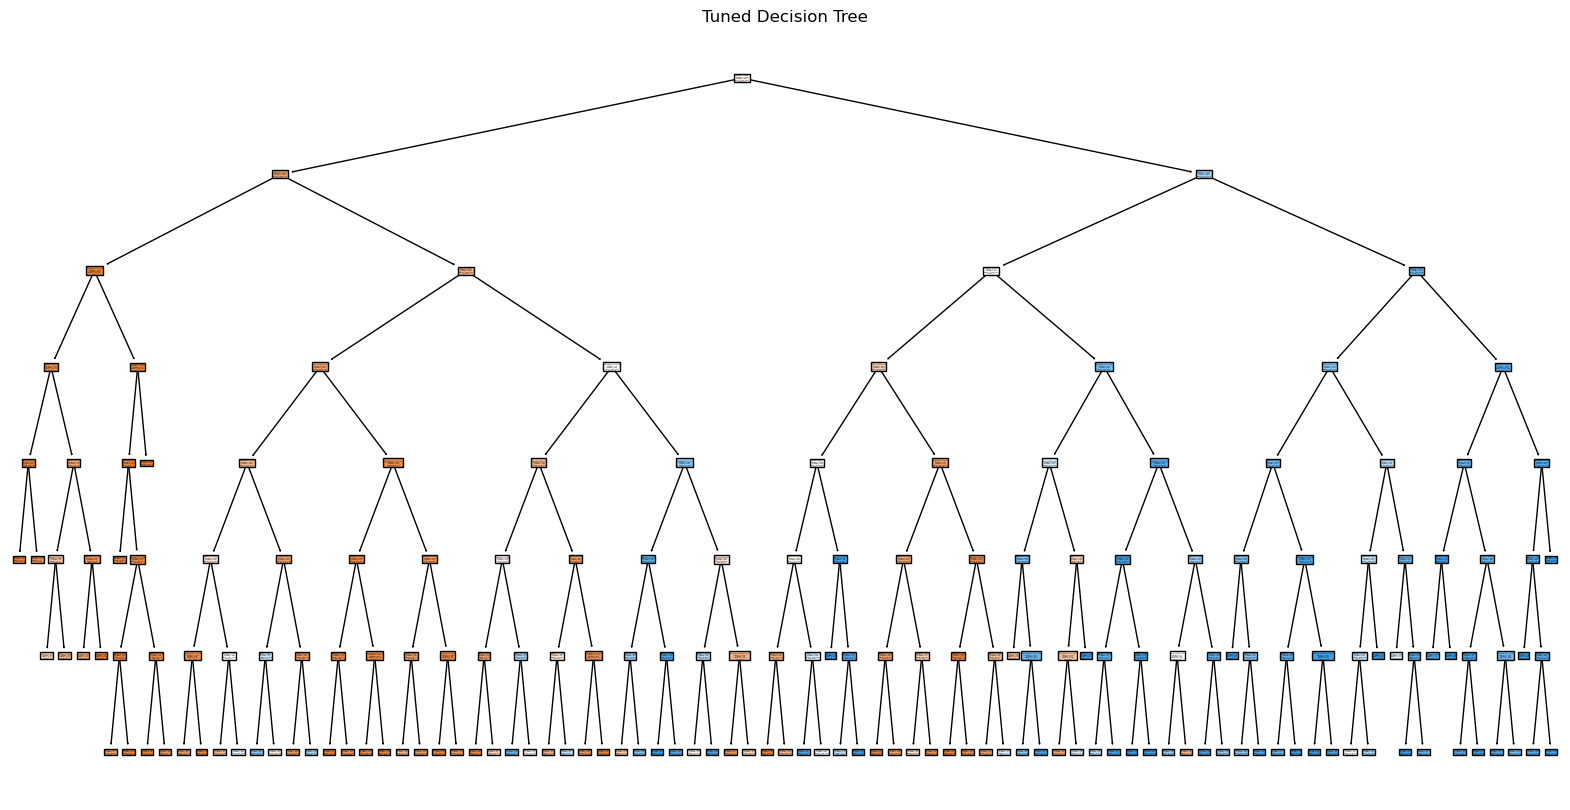

In [589]:
# Visualizing the decision tree for the best model
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Tuned Decision Tree')
plt.show()

In [590]:
# Evaluate the best model on the test set
Y_pred_best = best_clf.predict(X_test)
print("\nWith Hyperparameter Tuning - Test Set Evaluation")
print("Accuracy:", accuracy_score(Y_test, Y_pred_best))
print("Precision:", precision_score(Y_test, Y_pred_best, average='macro'))
print("Recall:", recall_score(Y_test, Y_pred_best, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred_best))
print("Classification Report:\n", classification_report(Y_test, Y_pred_best))


With Hyperparameter Tuning - Test Set Evaluation
Accuracy: 0.8004299534217126
Precision: 0.8055881556378082
Recall: 0.8029254142793956
Confusion Matrix:
 [[1074  377]
 [ 180 1160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.74      0.79      1451
           1       0.75      0.87      0.81      1340

    accuracy                           0.80      2791
   macro avg       0.81      0.80      0.80      2791
weighted avg       0.81      0.80      0.80      2791

